# ================= FIFA Offical Anlaysis.==================

#### - The FIFA World Cup is the biggest single-event sporting competition in the world. FIFA is making publicity and advertising for the FIFA world cup in 2022. FIFA hires our team to analyze the data for predicting which team will be the champion in the 2022 world cup and which team will be in the quarter-final, semi-final, and final match as well. They also want us to analyze which player will be the next golden ball award winner in 2022. The results will be used in advertising and publicity to attract audiences or sponsors to involve. 

#### we will start our analysis from cleaning the data because the columns "Club"," Club logo", "Photo", "Flag", "Loaned. From", "Real face", and "Body type","Height", "Weight” are not used in our analysis. especially, in this data we have many detail data about physical ability, so the height and the weight can be ignored. Next, we will filter out the players whose age are over 45. this is because as the recording from FIFA, the oldest player is 45 years old from Egypt. the next FIFA will be in 2022, so some player in data may already retire in that time. 

#### Then, we will analyze from Overall score and potential score to each position score for the different purpose. For a golden ball award winner, we will focus on "ST", "LS", "RS", and "CF" and compare these with the score of server ability score. for team prediction, we will focus on the average of the ability in each country. The champion team needs a good balance between each teammate. At final, there will be a summary and recommendation for FIFA.

## 1.) =================== Preparation===================

In [1]:
FIFA <- read.csv("~/project-ionic/R/project/data.csv")

In [2]:
FIFA$Height_cm <-as.character(FIFA$Height_cm)

In [3]:
FIFA$Height_cm <-as.numeric(FIFA$Height_cm)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [4]:
FIFA$Weight_kg <-as.character(FIFA$Weight_kg)

In [5]:
FIFA$Weight_kg <-as.numeric(FIFA$Weight_kg)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [6]:
FIFA$potential_value <-as.character(FIFA$potential_value)

In [7]:
FIFA$potential_value <-as.numeric(FIFA$potential_value)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [8]:
FIFA$Position <- as.character(FIFA$Position)

In [9]:
head(FIFA$Position,20)

[1] "RF"  "ST"  "LW"  "GK"  "RCM" "LF"  "RCM" "RS"  "RCB" "GK"  "ST"  "LCM"
[13] "CB"  "LCM" "LDM" "LF"  "ST"  "CAM" "GK"  "GK"

In [10]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [11]:
head (FIFA)

X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,⋯,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,⋯,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,⋯,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,⋯,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,⋯,88,68,58,51,15,13,5,10,13,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,⋯,91,34,27,22,11,12,6,8,8,€172.1M


In [12]:
names(FIFA)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "potential_value"         
[13] "Value"                    "Salary"                  
[15] "Wage"                     "Special"                 
[17] "Preferred.Foot"           "International.Reputation"
[19] "Weak.Foot"                "Skill.Moves"             
[21] "Work.Rate"                "Body.Type"               
[23] "Real.Face"                "Position"                
[25] "Jersey.Number"            "Joined"                  
[27] "Loaned.From"              "Contract.Valid.Until"    
[29] "feet"                     "inch"                    
[31] "Height_cm"                "Height"                  
[33] "Weight_kg"                "Weight"                  
[35] "LS"                       "ST"                      
[37] "RS"                       "LW"                      
[39] "LF"                       "CF"                      
[41] "RF"                       "RW"                      
[43] "LAM"                      "CAM"                     
[45] "RAM"                      "LM"                      
[47] "LCM"                      "CM"                      
[49] "RCM"                      "RM"                      
[51] "LWB"                      "LDM"                     
[53] "CDM"                      "RDM"                     
[55] "RWB"                      "LB"                      
[57] "LCB"                      "CB"                      
[59] "RCB"                      "RB"                      
[61] "Crossing"                 "Finishing"               
[63] "HeadingAccuracy"          "ShortPassing"            
[65] "Volleys"                  "Dribbling"               
[67] "Curve"                    "FKAccuracy"              
[69] "LongPassing"              "BallControl"             
[71] "Acceleration"             "SprintSpeed"             
[73] "Agility"                  "Reactions"               
[75] "Balance"                  "ShotPower"               
[77] "Jumping"                  "Stamina"                 
[79] "Strength"                 "LongShots"               
[81] "Aggression"               "Interceptions"           
[83] "Positioning"              "Vision"                  
[85] "Penalties"                "Composure"               
[87] "Marking"                  "StandingTackle"          
[89] "SlidingTackle"            "GKDiving"                
[91] "GKHandling"               "GKKicking"               
[93] "GKPositioning"            "GKReflexes"              
[95] "Release.Clause"

## 2.)==================Data Exploration====================

## 2.a )  AGE and Players Correlation

Age,Num
21,1423
26,1387
24,1358
22,1340
23,1332
25,1319
20,1240
27,1162
28,1101
19,1024


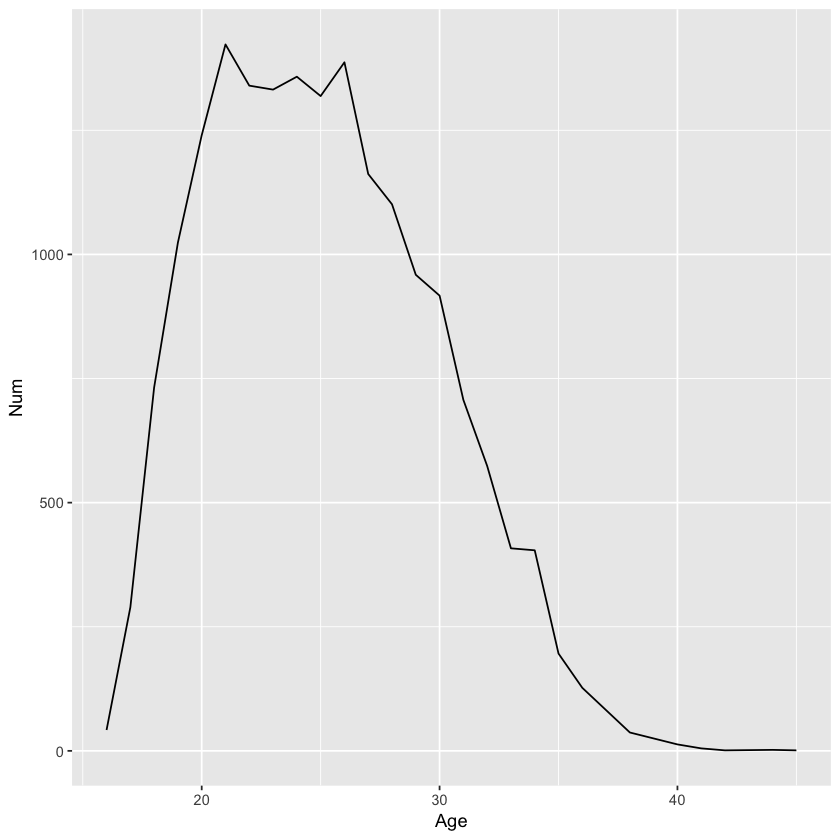

In [13]:
Age_FIFA <- FIFA %>% group_by (Age) %>% summarize (Num = n())
qplot(Age, Num, data = Age_FIFA,
         geom = c("line"))
head(Age_FIFA[order(Age_FIFA$Num, decreasing = T), ], 10)

## Explanation:
### The most all players' age in world cup is in the range 19~26. The highest population in the group of age is 21.  

## 2.b )  Countries and Players Correlation

Nationality,Num
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478
Netherlands,453


[1] 111.0183

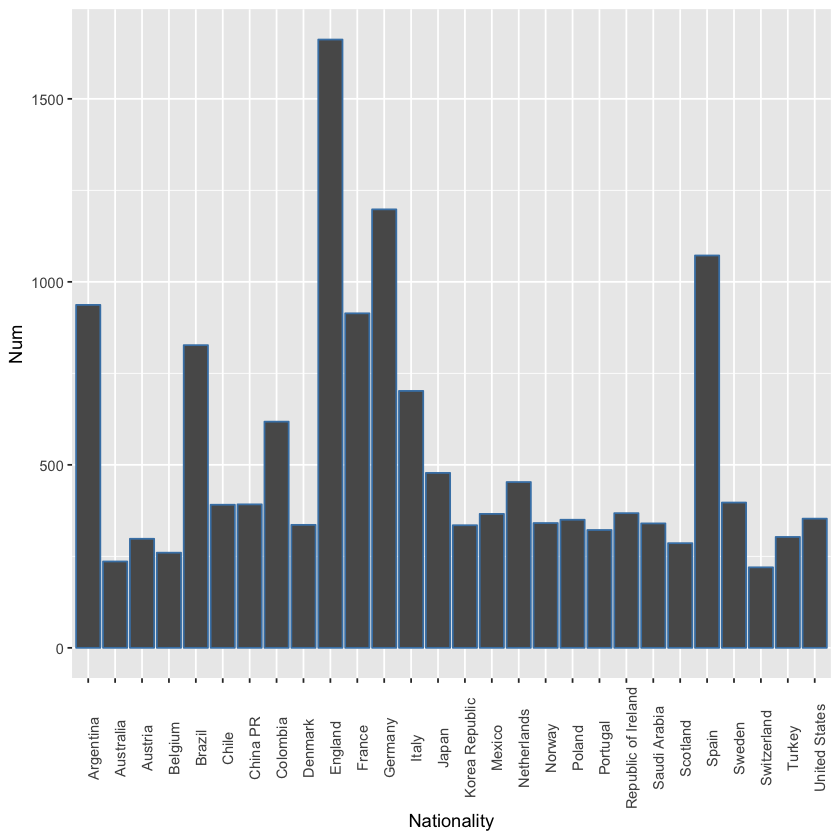

In [14]:
Nationality_FIFA <- FIFA %>% group_by (Nationality) %>% summarize (Num = n())

head(Nationality_FIFA[order(Nationality_FIFA$Num, decreasing = T), ], 10)

mean(Nationality_FIFA$Num)

ANationality_FIFA <- Nationality_FIFA %>% filter(Num >= 200)


ggplot(ANationality_FIFA) + geom_bar(stat = "identity", color = 'steelblue', 
                            aes(x = Nationality, y = Num)) + theme(axis.text.x=element_text(size=rel(1), angle=90))

## Explanation:
### After, We calculate the total number of players in each country, we found the average of number is 111. So, we filter out the total number under 200. In bar chart,  it appears that the players from England, Germany, Spain, Argentina take up most of part.

## 2.c )  Preferred Foot and Players Correlation

Preferred.Foot,Num
,48
Left,4211
Right,13948


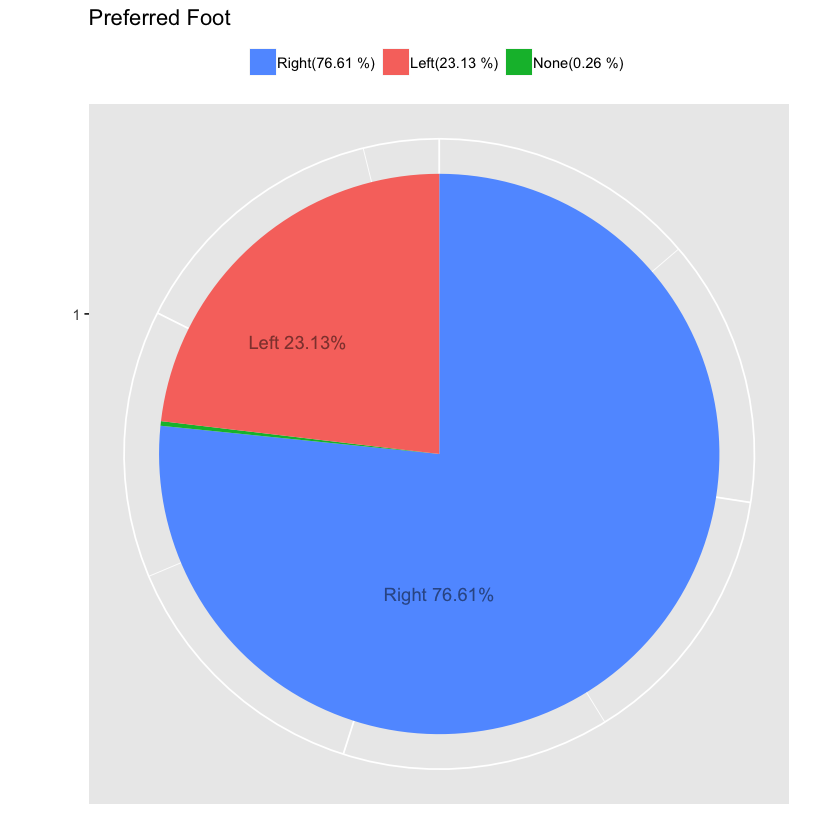

In [15]:
PreferredFoot_FIFA <- FIFA %>% group_by (Preferred.Foot) %>% summarize (Num = n())
PreferredFoot_FIFA

foot_pie <- data.frame(foot_pie = c("Left", "Right", "None"),
                      Foot_perc=c(4211,13948,48))
                 foot_pie = foot_pie[order(foot_pie$Foot_perc, decreasing = TRUE),] 
                     myLabel = as.vector(foot_pie$foot_pie)
                    myLabel = paste(myLabel, "(", round(foot_pie$Foot_perc / sum(PreferredFoot_FIFA$Num) * 100, 2), " %) ", sep = "")                       
                 
ggplot((data=foot_pie),aes(x=factor(1), y=Foot_perc, fill=foot_pie)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "Preferred Foot") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = foot_pie$foot_pie, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Right 76.61%", alpha = 0.2)+
    geom_text(x = 0.9, y = 40, label = "Left 23.13%                                                        ", alpha = 0.2)

## Explanation:
### Most all of players' preferred foot are right taking up 76%. Left players take up 23% in the pie chart.

## 2.d ) Physical Status (Height & Weight) and Players Correlation

test_Height <- FIFA %>% group_by(Height_cm) %>% summarize(num = n())

test_Weight <- FIFA %>% group_by(Weight_kg) %>% summarize(num = n())

head(test_Height[order(test_Height$num, decreasing = T), ], 15)

head(test_Weight[order(test_Weight$num, decreasing = T), ], 15)


plot( FIFA$Height_cm, FIFA$Weight_kg, type = "point",
     pch=21, bg=c("yellow"), xlab = "Height", ylab ="Weight",
     main="Height(cm) and Weight (Kg)")


## Explanation:
### According to the chart, it appears that the most all of players' height and weight has a positive correlation. The meaning is soccer players are not too fat and thin. For a good performance, they keep their shape of body in a good condition.


## 3.)==================Data Cleaning====================

In [16]:
names(FIFA)
FIFA <- subset(FIFA, select = -c(Club, Club.Logo, Photo, Flag, Loaned.From, Real.Face, Body.Type, Contract.Valid.Until, Release.Clause, Height,Weight))
names(FIFA)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "potential_value"         
[13] "Value"                    "Salary"                  
[15] "Wage"                     "Special"                 
[17] "Preferred.Foot"           "International.Reputation"
[19] "Weak.Foot"                "Skill.Moves"             
[21] "Work.Rate"                "Body.Type"               
[23] "Real.Face"                "Position"                
[25] "Jersey.Number"            "Joined"                  
[27] "Loaned.From"              "Contract.Valid.Until"    
[29] "feet"                     "inch"                    
[31] "Height_cm"                "Height"                  
[33] "Weight_kg"                "Weight"                  
[35] "LS"                       "ST"                      
[37] "RS"                       "LW"                      
[39] "LF"                       "CF"                      
[41] "RF"                       "RW"                      
[43] "LAM"                      "CAM"                     
[45] "RAM"                      "LM"                      
[47] "LCM"                      "CM"                      
[49] "RCM"                      "RM"                      
[51] "LWB"                      "LDM"                     
[53] "CDM"                      "RDM"                     
[55] "RWB"                      "LB"                      
[57] "LCB"                      "CB"                      
[59] "RCB"                      "RB"                      
[61] "Crossing"                 "Finishing"               
[63] "HeadingAccuracy"          "ShortPassing"            
[65] "Volleys"                  "Dribbling"               
[67] "Curve"                    "FKAccuracy"              
[69] "LongPassing"              "BallControl"             
[71] "Acceleration"             "SprintSpeed"             
[73] "Agility"                  "Reactions"               
[75] "Balance"                  "ShotPower"               
[77] "Jumping"                  "Stamina"                 
[79] "Strength"                 "LongShots"               
[81] "Aggression"               "Interceptions"           
[83] "Positioning"              "Vision"                  
[85] "Penalties"                "Composure"               
[87] "Marking"                  "StandingTackle"          
[89] "SlidingTackle"            "GKDiving"                
[91] "GKHandling"               "GKKicking"               
[93] "GKPositioning"            "GKReflexes"              
[95] "Release.Clause"

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Nationality"              "Overall"                 
 [7] "Potential"                "potential_value"         
 [9] "Value"                    "Salary"                  
[11] "Wage"                     "Special"                 
[13] "Preferred.Foot"           "International.Reputation"
[15] "Weak.Foot"                "Skill.Moves"             
[17] "Work.Rate"                "Position"                
[19] "Jersey.Number"            "Joined"                  
[21] "feet"                     "inch"                    
[23] "Height_cm"                "Weight_kg"               
[25] "LS"                       "ST"                      
[27] "RS"                       "LW"                      
[29] "LF"                       "CF"                      
[31] "RF"                       "RW"                      
[33] "LAM"                      "CAM"                     
[35] "RAM"                      "LM"                      
[37] "LCM"                      "CM"                      
[39] "RCM"                      "RM"                      
[41] "LWB"                      "LDM"                     
[43] "CDM"                      "RDM"                     
[45] "RWB"                      "LB"                      
[47] "LCB"                      "CB"                      
[49] "RCB"                      "RB"                      
[51] "Crossing"                 "Finishing"               
[53] "HeadingAccuracy"          "ShortPassing"            
[55] "Volleys"                  "Dribbling"               
[57] "Curve"                    "FKAccuracy"              
[59] "LongPassing"              "BallControl"             
[61] "Acceleration"             "SprintSpeed"             
[63] "Agility"                  "Reactions"               
[65] "Balance"                  "ShotPower"               
[67] "Jumping"                  "Stamina"                 
[69] "Strength"                 "LongShots"               
[71] "Aggression"               "Interceptions"           
[73] "Positioning"              "Vision"                  
[75] "Penalties"                "Composure"               
[77] "Marking"                  "StandingTackle"          
[79] "SlidingTackle"            "GKDiving"                
[81] "GKHandling"               "GKKicking"               
[83] "GKPositioning"            "GKReflexes"

## Explanation:
### I clean the columns: "Club","Club logo","Photo","Flag","Loaned.From","Realface",and "Bodytype" which are not useful for our analysis.

## 4.)===================Adaptation====================

In [17]:
FIFA<-within(FIFA,{ Score<- as.integer(Potential)-as.integer(Overall)})
head (FIFA)

X,ID,Name,Age,Nationality,Overall,Potential,potential_value,Value,Salary,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Score
0,158023,L. Messi,31,Argentina,94,94,110.5,€110.5M,565000,⋯,96,33,28,26,6,11,15,14,8,0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77.0,€77M,566000,⋯,95,28,31,23,7,11,15,14,11,0
2,190871,Neymar Jr,26,Brazil,92,93,118.5,€118.5M,567000,⋯,94,27,24,33,9,9,15,15,11,1
3,193080,De Gea,27,Spain,91,93,72.0,€72M,568000,⋯,68,15,21,13,90,85,87,88,94,2
4,192985,K. De Bruyne,27,Belgium,91,92,102.0,€102M,569000,⋯,88,68,58,51,15,13,5,10,13,1
5,183277,E. Hazard,27,Belgium,91,91,93.0,€93M,570000,⋯,91,34,27,22,11,12,6,8,8,0


## Explanation:
### We have create a Score column which is made by potencial score cut overall score that allows us to understand the possibility of each player easily.

## 5.)===================Predict====================

### a. Potential capability

,X,ID,Name,Age,Nationality,Overall,Potential,potential_value,Value,Salary,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Score
16029,16028,244592,J. von Moos,17,Switzerland,58,84,NA,€280K,2000,⋯,45,36,16,12,11,13,12,14,8,26
18073,18072,238758,D. Campbell,17,Scotland,50,76,NA,€60K,1000,⋯,42,32,40,24,11,14,9,14,11,26
16630,16629,246241,Y. Lenze,17,Germany,57,82,NA,€190K,1000,⋯,46,11,14,13,58,55,63,51,60,25
17176,17175,243353,B. Mumba,16,England,55,80,NA,€190K,1000,⋯,54,55,56,54,14,9,8,11,14,25
17785,17784,246100,K. Askildsen,17,Norway,52,77,NA,€110K,1000,⋯,52,43,45,51,9,12,7,10,8,25
13928,13927,241403,A. Dabo,17,France,62,86,NA,€650K,2000,⋯,40,62,65,63,8,8,14,5,10,24
15729,15728,245721,G. Azzinnari,17,Italy,59,83,NA,€350K,1000,⋯,50,42,25,20,14,12,13,10,10,24
16817,16816,245361,I. Sauter,17,Switzerland,56,80,NA,€180K,1000,⋯,55,50,57,54,11,9,8,10,13,24
18045,18044,246109,K. Lara,16,Colombia,50,74,NA,€60K,1000,⋯,32,47,50,47,9,13,8,12,9,24
18051,18050,245370,E. Destanoglu,17,Turkey,50,74,NA,€50K,1000,⋯,21,6,13,12,52,52,50,47,52,24


Warning message in plot.xy(xy, type, ...):
“plot type 'bar' will be truncated to first character”

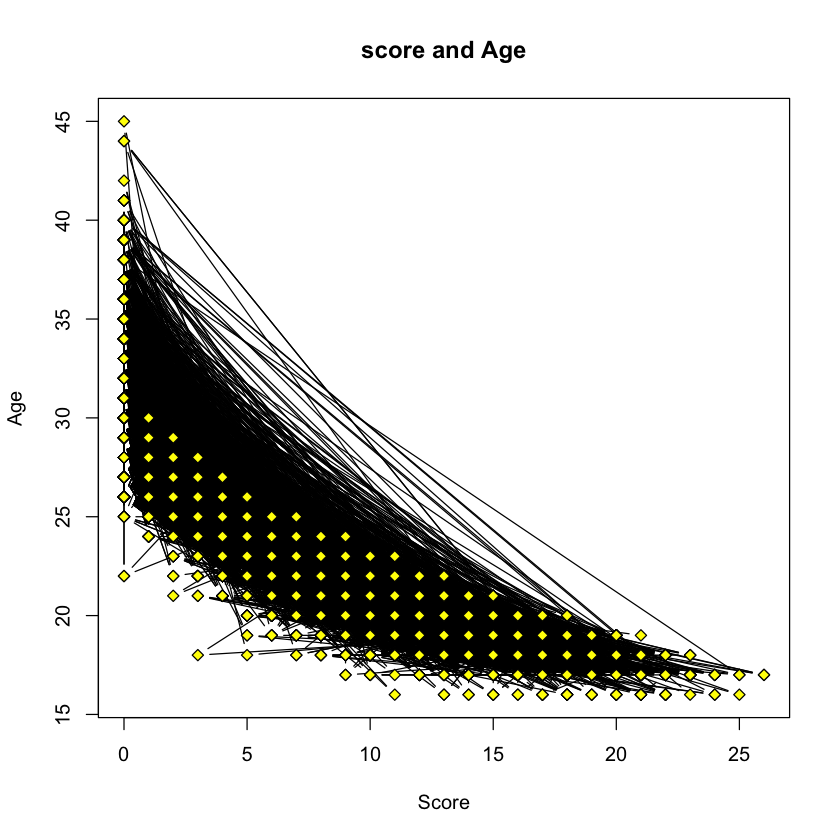

In [18]:
head(FIFA[order(FIFA$Score, decreasing = T), ], 10)
plot( FIFA$Score,FIFA$Age, type = "bar",
     pch=23, bg=c("yellow"), xlab = "Score", ylab ="Age",
     main="score and Age")

# Linear regression 


Call:
lm(formula = Score ~ Age, data = FIFA)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2057 -2.1869 -0.1994  1.7985 14.8507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.243294   0.110668   273.3   <2e-16 ***
Age         -1.002089   0.004331  -231.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.729 on 18205 degrees of freedom
Multiple R-squared:  0.7462,	Adjusted R-squared:  0.7462 
F-statistic: 5.353e+04 on 1 and 18205 DF,  p-value: < 2.2e-16


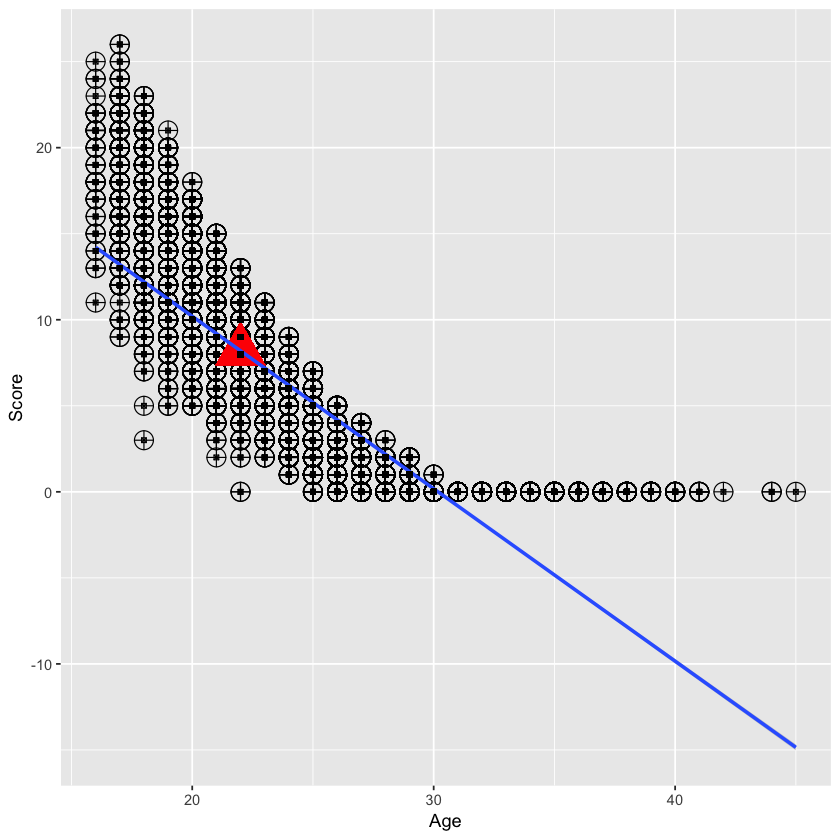

In [44]:
#lm(y~x)  
ScoreLM <- lm(Score ~Age , data = FIFA) 
summary(ScoreLM)

new <- data.frame(Age = 22) 
result <- predict(ScoreLM, newdata = new) 


ggplot(FIFA, aes(x = Age , y = Score )) +geom_point(shape = 10, size = 5) + 
geom_point(x = new$Age, y = result, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Age", y = "Score") 

## Explanation:
### After we analyze the Score(overall - potential) which means the player who has higher score is higher potential, we found younger player has higher chance to inspire their potential. On the other hand, the older player has stable performance in matches.


Call:
lm(formula = Potential ~ Overall, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6004  -3.5153  -0.6894   3.1162  17.5292 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.42226    0.32900   98.55   <2e-16 ***
Overall      0.58704    0.00494  118.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.605 on 18205 degrees of freedom
Multiple R-squared:  0.4368,	Adjusted R-squared:  0.4368 
F-statistic: 1.412e+04 on 1 and 18205 DF,  p-value: < 2.2e-16


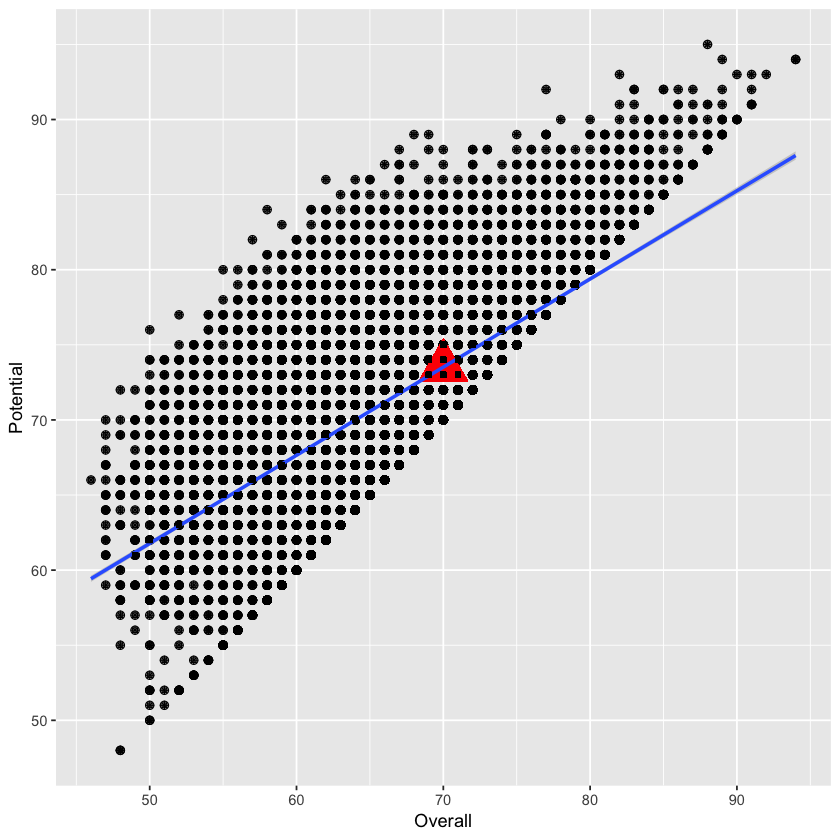

In [52]:
model2 <- lm(Potential ~ Overall, data = FIFA) 
summary(model2)

new2 <- data.frame(Overall = 70) 
result2 <- predict(model2, newdata = new2) 


ggplot(FIFA, aes(x = Overall , y = Potential )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new2$Overall, y = result2, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Overall", y = "Potential") 

In [63]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Call:
lm(formula = potential_value ~ Overall, data = FIFA)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.881  -2.045  -0.478   0.911  86.063 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -95.35209    0.95880  -99.45   <2e-16 ***
Overall       1.38901    0.01318  105.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.013 on 7097 degrees of freedom
  (11108 observations deleted due to missingness)
Multiple R-squared:  0.6102,	Adjusted R-squared:  0.6101 
F-statistic: 1.111e+04 on 1 and 7097 DF,  p-value: < 2.2e-16


Warning message:
“Removed 11108 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11108 rows containing missing values (geom_point).”Warning message:
“Removed 11108 rows containing missing values (geom_point).”

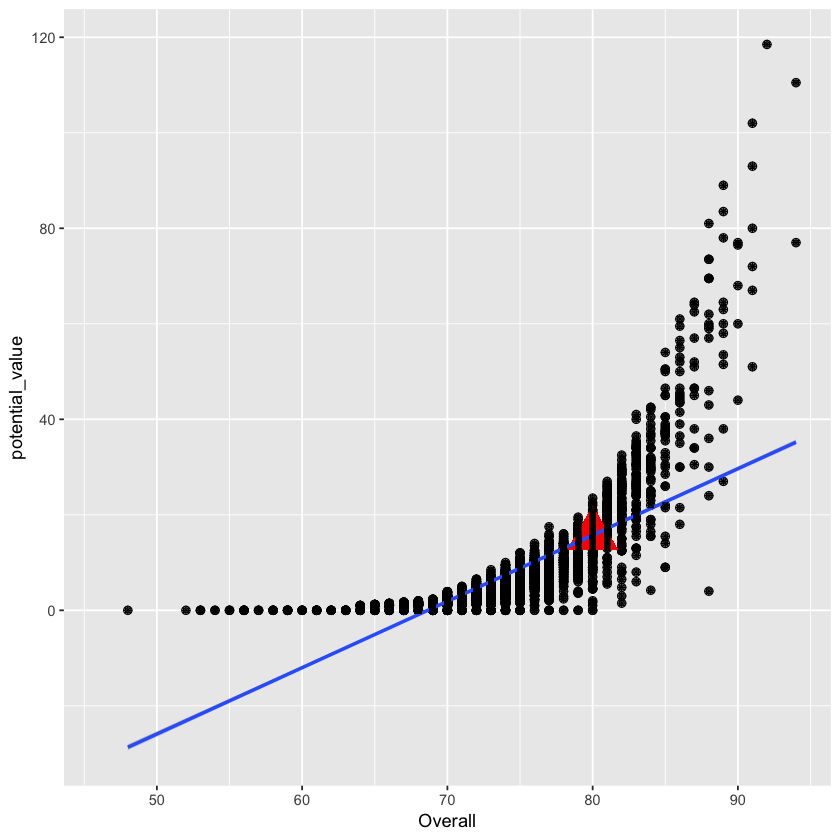

In [56]:
model3 <- lm(potential_value ~ Overall, data = FIFA) 
summary(model3)

new3 <- data.frame(Overall = 80) 
result3 <- predict(model3, newdata = new3) 


ggplot(FIFA, aes(x = Overall , y = potential_value )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new3$Overall, y = result3, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Overall", y = "potential_value") 

In [66]:
names(FIFA)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Nationality"              "Overall"                 
 [7] "Potential"                "potential_value"         
 [9] "Value"                    "Salary"                  
[11] "Wage"                     "Special"                 
[13] "Preferred.Foot"           "International.Reputation"
[15] "Weak.Foot"                "Skill.Moves"             
[17] "Work.Rate"                "Position"                
[19] "Jersey.Number"            "Joined"                  
[21] "feet"                     "inch"                    
[23] "Height_cm"                "Weight_kg"               
[25] "LS"                       "ST"                      
[27] "RS"                       "LW"                      
[29] "LF"                       "CF"                      
[31] "RF"                       "RW"                      
[33] "LAM"                      "CAM"                     
[35] "RAM"                      "LM"                      
[37] "LCM"                      "CM"                      
[39] "RCM"                      "RM"                      
[41] "LWB"                      "LDM"                     
[43] "CDM"                      "RDM"                     
[45] "RWB"                      "LB"                      
[47] "LCB"                      "CB"                      
[49] "RCB"                      "RB"                      
[51] "Crossing"                 "Finishing"               
[53] "HeadingAccuracy"          "ShortPassing"            
[55] "Volleys"                  "Dribbling"               
[57] "Curve"                    "FKAccuracy"              
[59] "LongPassing"              "BallControl"             
[61] "Acceleration"             "SprintSpeed"             
[63] "Agility"                  "Reactions"               
[65] "Balance"                  "ShotPower"               
[67] "Jumping"                  "Stamina"                 
[69] "Strength"                 "LongShots"               
[71] "Aggression"               "Interceptions"           
[73] "Positioning"              "Vision"                  
[75] "Penalties"                "Composure"               
[77] "Marking"                  "StandingTackle"          
[79] "SlidingTackle"            "GKDiving"                
[81] "GKHandling"               "GKKicking"               
[83] "GKPositioning"            "GKReflexes"              
[85] "Score"

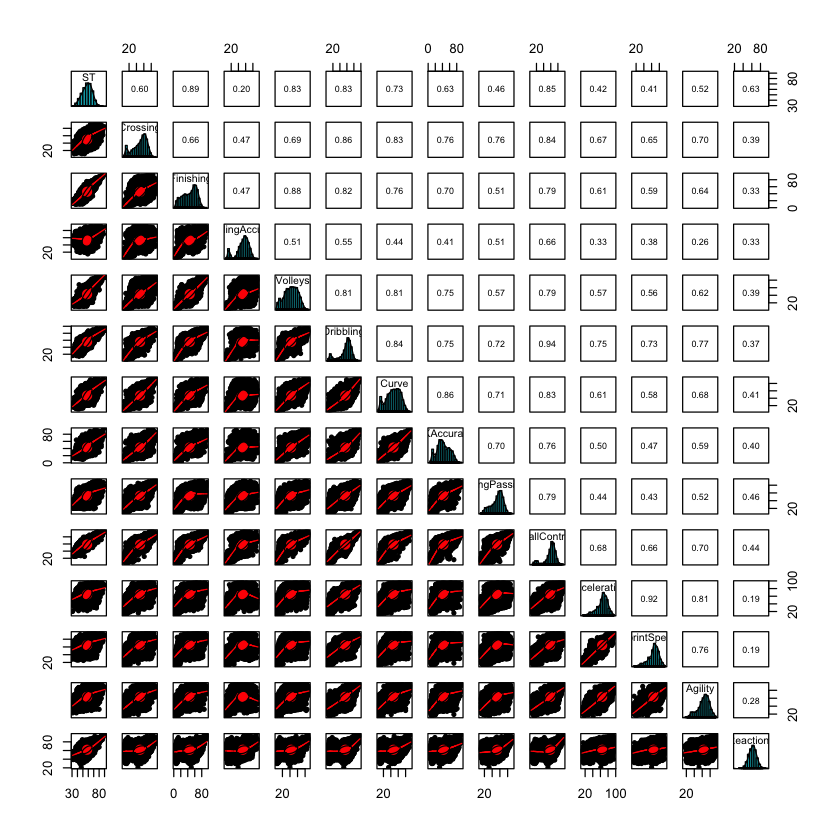

In [77]:
correlation<- select(FIFA, ST,
                     Crossing,Finishing,HeadingAccuracy,ShortPassing,
                        Volleys,Dribbling,Curve,FKAccuracy,
                        LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions)

pairs.panels(correlation[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Call:
lm(formula = ST ~ Finishing, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9179  -2.8295  -0.0357   2.7074  18.4422 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.300934   0.106502   312.7   <2e-16 ***
Finishing    0.492633   0.002033   242.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.227 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7846 
F-statistic: 5.872e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

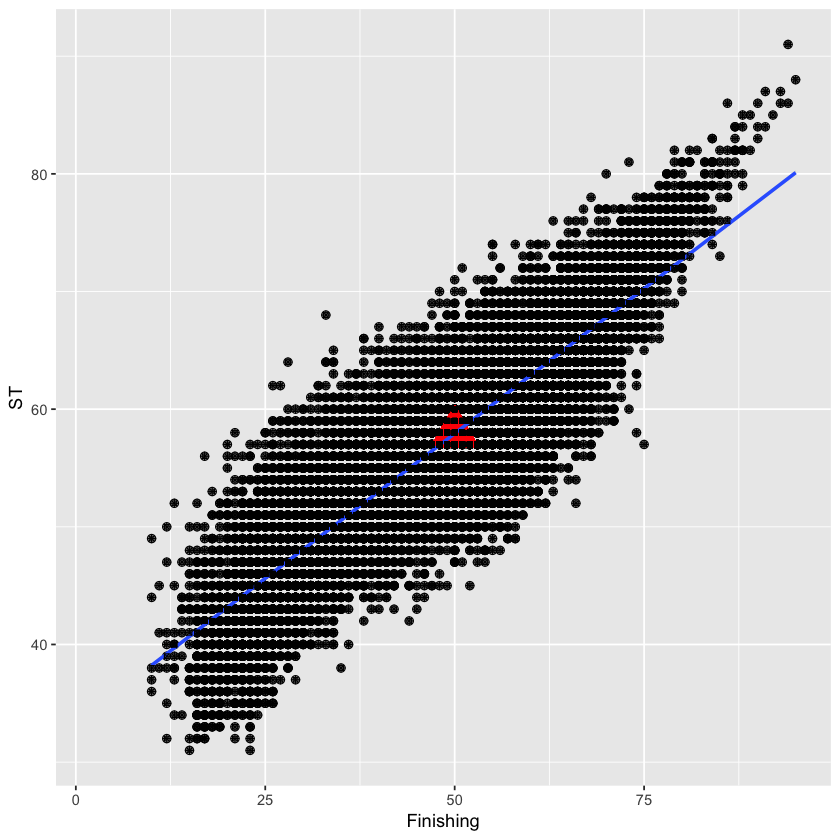

In [72]:
model4 <- lm(ST ~ Finishing, data = FIFA) 
summary(model4)

new4 <- data.frame(Finishing = 50) 
result4 <- predict(model4, newdata = new4) 


ggplot(FIFA, aes(x = Finishing , y = ST )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new4$Finishing, y = result4, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Finishing", y = "ST") 


Call:
lm(formula = ST ~ BallControl, data = FIFA)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9822  -3.2698   0.0292   3.3508  24.6034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.144035   0.243994   37.48   <2e-16 ***
BallControl 0.770103   0.003813  201.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.848 on 16120 degrees of freedom
  (2085 observations deleted due to missingness)
Multiple R-squared:  0.7167,	Adjusted R-squared:  0.7167 
F-statistic: 4.079e+04 on 1 and 16120 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2085 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”Warning message:
“Removed 2085 rows containing missing values (geom_point).”

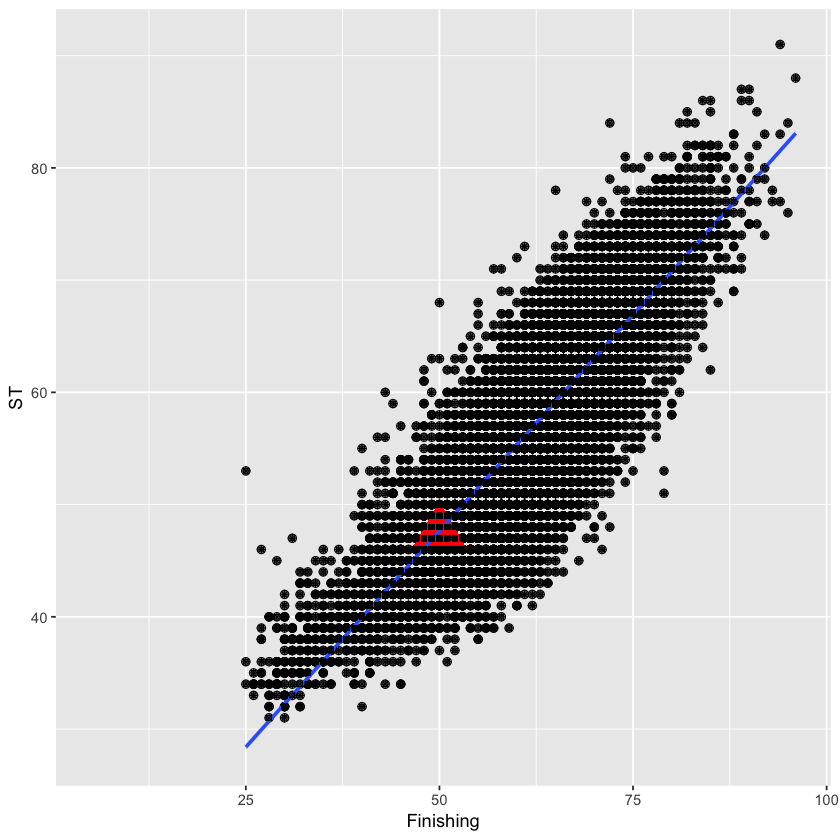

In [81]:
model5 <- lm(ST ~ BallControl, data = FIFA) 
summary(model5)

new5 <- data.frame(BallControl = 50) 
result5 <- predict(model5, newdata = new5) 


ggplot(FIFA, aes(x = BallControl , y = ST )) +geom_point(shape = 10, size = 2) + 
geom_point(x = new5$BallControl, y = result5, size = 10, shape = 17, color = "red")+ 
geom_smooth(method = lm)+
geom_point(shape = 7, size = 1) + labs(x = "Finishing", y = "ST") 

# Multiple Linear Regression

In [ ]:
SalaryofPlayer <- lm(Overall ~  Potential +potential_value, data = FIFA) 
summary(SalaryofPlayer)

In [ ]:
NewSalaryofPlayer <- data.frame(Overall = 89) 
result2 <- predict(SalaryofPlayer, newdata = NewSalaryofPlayer) 

# best Squard

In [75]:
#GOALKeep

GoalKeeper_position<- FIFA %>% filter(Position == "GK") %>% 
select (Name, Nationality, Overall, Score, Position)
head(GoalKeeper_position)

#forward_position
forward_position<- FIFA %>% filter(Position == "LS" | Position == "RS" | Position == "LW" | Position == "RW" |  
                          Position == "ST" |  Position == "LF" |  Position == "RF" |  Position == "CF") %>% 
select (Name, Nationality, Overall, Score, Position)
head(forward_position[order(forward_position$Overall, decreasing = T), ],10)


#Midfield_position
Midfield_position<- FIFA %>% filter( Position == "RAM" | Position == "LCM" | Position == "RCM" |
                          Position == "RM" |  Position == "LM" |  Position == "CM" |  Position == "CAM" |  Position == "LDM" |
                                    Position == "CDM" |  Position == "RDM")  %>% select (Name, Nationality, Overall, Score, Position)
head(Midfield_position[order(Midfield_position$Overall, decreasing = T), ],10)


#Back_position
Back_position<- FIFA %>% filter(Position == "LWB" | Position == "RWB" | Position == "CB" | Position == "RCB" |  
                          Position == "LCB" |  Position == "LB" |  Position == "RB") %>% 
select (Name, Nationality, Overall, Score, Position)

head(Back_position[order(Back_position$Overall, decreasing = T), ],10)


Name,Nationality,Overall,Score,Position
De Gea,Spain,91,2,GK
J. Oblak,Slovenia,90,3,GK
M. ter Stegen,Germany,89,3,GK
T. Courtois,Belgium,89,1,GK
M. Neuer,Germany,89,0,GK
H. Lloris,France,88,0,GK


Name,Nationality,Overall,Score,Position
L. Messi,Argentina,94,0,RF
Cristiano Ronaldo,Portugal,94,0,ST
Neymar Jr,Brazil,92,1,LW
E. Hazard,Belgium,91,0,LF
L. Suárez,Uruguay,91,0,RS
R. Lewandowski,Poland,90,0,ST
P. Dybala,Argentina,89,5,LF
H. Kane,England,89,2,ST
E. Cavani,Uruguay,89,0,LS
S. Agüero,Argentina,89,0,ST


Name,Nationality,Overall,Score,Position
K. De Bruyne,Belgium,91,1,RCM
L. Modrić,Croatia,91,0,RCM
T. Kroos,Germany,90,0,LCM
David Silva,Spain,90,0,LCM
N. Kanté,France,89,1,LDM
A. Griezmann,France,89,1,CAM
Sergio Busquets,Spain,89,0,CDM
K. Mbappé,France,88,7,RM
M. Salah,Egypt,88,1,RM
Casemiro,Brazil,88,2,CDM


Name,Nationality,Overall,Score,Position
Sergio Ramos,Spain,91,0,RCB
D. Godín,Uruguay,90,0,CB
G. Chiellini,Italy,89,0,LCB
M. Hummels,Germany,88,0,LCB
Marcelo,Brazil,88,0,LB
Thiago Silva,Brazil,88,0,RCB
S. Umtiti,France,87,5,CB
K. Koulibaly,Senegal,87,3,LCB
Jordi Alba,Spain,87,0,LB
J. Vertonghen,Belgium,87,0,LCB


In [76]:

R_forward_position <- FIFA %>% filter(Position == "RS" | Position == "RW" |  Position == "RF" ) 
## %>% group_by(Nationality) %>% summarize(Average_overall = mean(Overall))
head(forward_position)
L_forward_position <- FIFA %>% filter(Position == "LS" | Position == "LW" |   Position == "LF") 
C_forward_position <- FIFA %>% filter(Position == "CF" | Position == "ST" ) 




Name,Nationality,Overall,Score,Position
L. Messi,Argentina,94,0,RF
Cristiano Ronaldo,Portugal,94,0,ST
Neymar Jr,Brazil,92,1,LW
E. Hazard,Belgium,91,0,LF
L. Suárez,Uruguay,91,0,RS
R. Lewandowski,Poland,90,0,ST


# 4-3-3

In [74]:
squa433 <- data.frame(Name=c("De Gea","L. Messi","Cristiano Ronaldo","Neymar Jr",
                             "K. De Bruyne","T. Kroos","A. Griezmann","S. Umtiti","G. Chiellini","D. Godín","Sergio Ramos"),
                      Natioanlity=c("Spain","Argentina","Portugal","Brazil",
                                    "Belgium","Germany","France","France","Italy","Uruguay","Spain"),
                      Overall=c(91,94,94,92,91,90,89,87,89,90,91),
                      Position=c("GK","RF","ST","LW","RCM","LCM","CAM","CB","LCB","CB","RCB"))
squa433
mean(squa433$Overall)

Name,Natioanlity,Overall,Position
De Gea,Spain,91,GK
L. Messi,Argentina,94,RF
Cristiano Ronaldo,Portugal,94,ST
Neymar Jr,Brazil,92,LW
K. De Bruyne,Belgium,91,RCM
T. Kroos,Germany,90,LCM
A. Griezmann,France,89,CAM
S. Umtiti,France,87,CB
G. Chiellini,Italy,89,LCB
D. Godín,Uruguay,90,CB


[1] 90.72727

## Summary: